In [78]:
import os
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from scipy.stats import spearmanr
%matplotlib inline

In [79]:
root_path = "/home/tpinho/IJGIS/Datasets/Brazil_Election_2018"
original = "Original"

In [80]:
brazil_datasets = ["Brazil_Election_2018_Sampled_dec0.3_prob0.1",
                   "Brazil_Election_2018_Sampled_dec0.3_prob0.2",
                   "Brazil_Election_2018_Sampled_dec0.3_prob0.3",
                   "Brazil_Election_2018_Sampled_dec0.3_prob0.4",
                   "Brazil_Election_2018_Sampled_dec0.3_prob0.5",
                   "Brazil_Election_2018_Sampled_dec0.3_prob0.6",
                   "Brazil_Election_2018_Sampled_dec0.3_prob0.7",
                   "Brazil_Election_2018_Sampled_dec0.3_prob0.8",
                   "Brazil_Election_2018_Sampled_dec0.3_prob0.9",
                  ]

us_corn_datasets = ["US_Corn_Yield_2016_Removed_ALABAMA",
                "US_Corn_Yield_2016_Removed_ARKANSAS",
                "US_Corn_Yield_2016_Removed_CALIFORNIA",
                "US_Corn_Yield_2016_Removed_COLORADO",
                "US_Corn_Yield_2016_Removed_DELAWARE",
                "US_Corn_Yield_2016_Removed_GEORGIA",
                "US_Corn_Yield_2016_Removed_IDAHO",
                "US_Corn_Yield_2016_Removed_ILLINOIS",
                "US_Corn_Yield_2016_Removed_INDIANA",
                "US_Corn_Yield_2016_Removed_IOWA",
                "US_Corn_Yield_2016_Removed_KANSAS",
                "US_Corn_Yield_2016_Removed_KENTUCKY",
                "US_Corn_Yield_2016_Removed_LOUISIANA",
                "US_Corn_Yield_2016_Removed_MARYLAND",
                "US_Corn_Yield_2016_Removed_MICHIGAN",
                "US_Corn_Yield_2016_Removed_MINNESOTA",
                "US_Corn_Yield_2016_Removed_MISSISSIPPI",
                "US_Corn_Yield_2016_Removed_MISSOURI",
                "US_Corn_Yield_2016_Removed_MONTANA",
                "US_Corn_Yield_2016_Removed_NEBRASKA",
                "US_Corn_Yield_2016_Removed_NEW JERSEY",
                "US_Corn_Yield_2016_Removed_NEW MEXICO",
                "US_Corn_Yield_2016_Removed_NEW YORK",
                "US_Corn_Yield_2016_Removed_NORTH CAROLINA",
                "US_Corn_Yield_2016_Removed_NORTH DAKOTA",
                "US_Corn_Yield_2016_Removed_OHIO",
                "US_Corn_Yield_2016_Removed_OKLAHOMA",
                "US_Corn_Yield_2016_Removed_PENNSYLVANIA",
                "US_Corn_Yield_2016_Removed_SOUTH CAROLINA",
                "US_Corn_Yield_2016_Removed_SOUTH DAKOTA",
                "US_Corn_Yield_2016_Removed_TENNESSEE",
                "US_Corn_Yield_2016_Removed_TEXAS",
                "US_Corn_Yield_2016_Removed_VIRGINIA",
                "US_Corn_Yield_2016_Removed_WEST VIRGINIA",
                "US_Corn_Yield_2016_Removed_WISCONSIN",
                "US_Corn_Yield_2016_Removed_WYOMING"]

us_corn_datasets = ["US_Corn_Yield_2016_Removed_Northeast",
                    "US_Corn_Yield_2016_Removed_Southeast",
                    "US_Corn_Yield_2016_Removed_Midwest",
                    "US_Corn_Yield_2016_Removed_Southwest",
                    "US_Corn_Yield_2016_Removed_West"]

us_wheat_datasets = ["US_Wheat_2014_Removed_Kansas",
                    "US_Wheat_2014_Removed_Montana",
                    "US_Wheat_2014_Removed_Oklahoma",
                    "US_Wheat_2014_Removed_Texas",
                    "US_Wheat_2014_Removed_Washington"]

australia_datasets = ["Australia_Election_2019_Sampled_dec0.05_prob0.1",
                "Australia_Election_2019_Sampled_dec0.05_prob0.2",
                "Australia_Election_2019_Sampled_dec0.05_prob0.3",
                "Australia_Election_2019_Sampled_dec0.05_prob0.4",
                "Australia_Election_2019_Sampled_dec0.05_prob0.5",
                "Australia_Election_2019_Sampled_dec0.05_prob0.6",
                "Australia_Election_2019_Sampled_dec0.05_prob0.7",
                "Australia_Election_2019_Sampled_dec0.05_prob0.8",
                "Australia_Election_2019_Sampled_dec0.05_prob0.9"]

scv_methods = ["CrossValidation",
               "Optimistic",
               "RegGBSCV_R_Kappa_0.0",
               "RegGBSCV_R_Kappa_0.1",
               "RegGBSCV_R_Kappa_0.2",
               "RegGBSCV_R_Kappa_0.3",  
               "RegGBSCV_R_Kappa_0.4",
               "RegGBSCV_R_Kappa_0.5",
               #"RegGBSCV_R_Kappa_0.6",
               #"RegGBSCV_R_Kappa_0.7", 
               #"RegGBSCV_R_Kappa_0.8",
               #"RegGBSCV_R_Kappa_0.9",
               #"RegGBSCV_R_Kappa_1.0",
               "TraditionalSCV"]

100%|██████████| 9/9 [00:00<00:00, 44.17it/s]


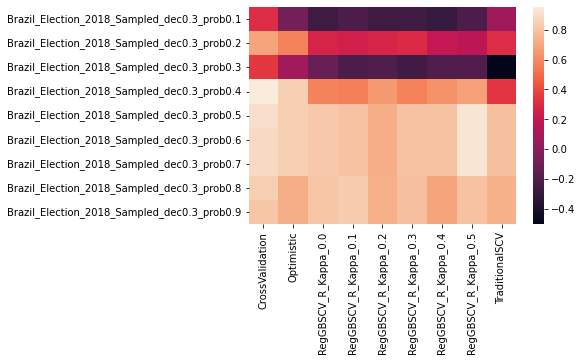

In [81]:
heatmap_data = pd.DataFrame(index=brazil_datasets, columns=scv_methods, dtype="float")
heatmap_rmse = pd.DataFrame(index=brazil_datasets, columns=scv_methods, dtype="float")

for sampled_data in tqdm(brazil_datasets):
    real_rank = pd.read_csv(os.path.join(root_path, sampled_data, "out_of_sample_error.csv"))
    real_rank["inverse_rank"] = 11 - real_rank["rank"]
    real_rank["weight"] = real_rank["inverse_rank"]/10
    max_dist_rank = sum(real_rank["weight"] * (real_rank["rank"] - real_rank["inverse_rank"])**2)
    sampled_rank = pd.read_csv(os.path.join(root_path, sampled_data, "comparison", "Rank.csv"))
    sampled_mse = pd.read_csv(os.path.join(root_path, sampled_data, "comparison", "RMSE.csv"))
    for scv in scv_methods:
        dist_rank = sum((real_rank["rank"] - sampled_rank[scv])**2)/max_dist_rank
        dist_rank, _ = spearmanr(real_rank["rank"], sampled_rank[scv]) 
        #diff_rmse = real_rank["rmse"] - sampled_mse[scv]
        heatmap_data.loc[sampled_data, scv] = dist_rank
cmap = sns.cm.rocket_r
heatmap_data.to_csv(os.path.join(root_path, "Rank_Dist.csv"))
fig = sns.heatmap(heatmap_data)
fig.figure.savefig(os.path.join(root_path, "rank_dist.jpg"))